In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


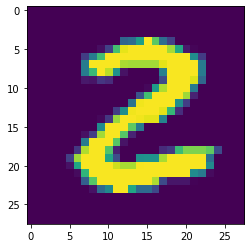

2


In [9]:
#displaying image
plt.imshow(x_train[25])
plt.show()

#print corresponding label
print(y_train[25])

In [10]:
#unique values in ytrain
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
## all images have the same dimensions, pixel values range from 0-255
## normalizing values bw 0 and 1,

x_train = x_train/255
x_test = x_test/255

In [15]:
##Building Neural Network

model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')])

#Compiling Neural Network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)



Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3024 - accuracy: 0.9131
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1400 - accuracy: 0.9576
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1039 - accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0687 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0394 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

In [17]:
y_pred = model.predict(x_test)

In [19]:
#Confusion Matrix
y_pred_labels = [np.argmax(i) for i in y_pred]
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 963    0    2    1    1    4    7    1    1    0]
 [   0 1124    3    1    0    2    1    0    4    0]
 [   2    2 1004    5    3    0    3    7    6    0]
 [   0    1    9  974    1   12    0    5    7    1]
 [   0    0    3    0  968    1    3    1    2    4]
 [   4    1    0    6    1  865    5    3    4    3]
 [   3    2    1    1    8    4  936    2    1    0]
 [   0    4   11    2    4    0    0  998    4    5]
 [   7    0    5    4    5    7    4    4  937    1]
 [   3    5    0    5   26    2    0    5    8  955]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

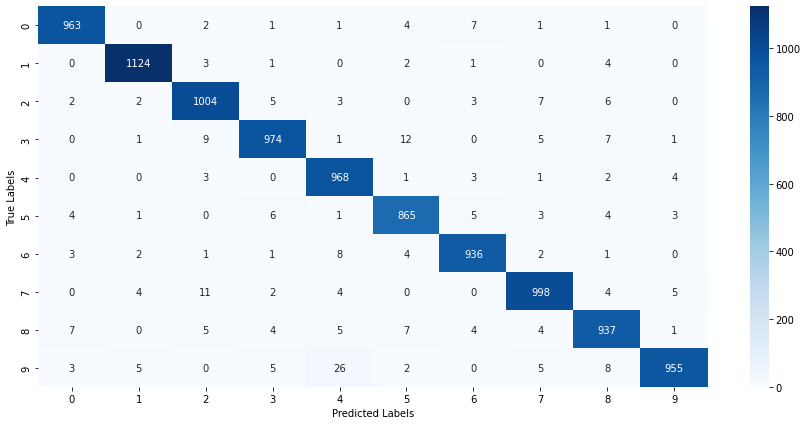

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

PREDICTING MY IMAGE

In [44]:
input_image_path = 'test_pic.png'

input_image = cv2.imread(input_image_path)

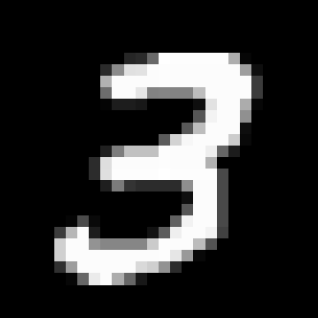

In [45]:
cv2_imshow(input_image)

In [46]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [47]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [48]:
cv2_imshow(input_image_resize)

In [49]:
input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)



3
